# Resultado dos experimentos

In [5]:
import random

In [6]:
random.seed(42)

In [7]:
cnpq = ['new_cnpq_level_1a',
        'new_cnpq_level_2a',
        'new_cnpq_level_3a',
       'new_cnpq_level_4a']

## Lendo a base de dados

In [8]:
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv('unidades_26082024-translated.csv', dtype=str, na_filter=False)

In [10]:
df.head()

,Unnamed: 0,fiocruz_id,Título,Resumo,Palavras-chaves do autor,Veículo de publicação,new_cnpq_level_1a,new_cnpq_level_2a,new_cnpq_level_3a,new_cnpq_level_4a,all
0,0,766be0fb94fb303594145c62dbe438b276d64344,Phylogenetic diversity of aerobic spore-formin...,The phylum Firmicutes comprises seven classes ...,"Firmicutes,Bacillus and related genera,Sporula...",INTERNATIONAL MICROBIOLOGY,Ciências Biológicas,Genética,Genética Molecular e de Microorganismos,,Phylogenetic diversity of aerobic spore-formin...
1,1,45676e2647955cc6f6c451fdda86309e2a2e91d3,"Isolation, Characterization and Antifungal Act...",Capsicum species belong to the Solanaceae fami...,"Trypsin inhibitor,Antimicrobial peptides,Capsi...",PROTEIN JOURNAL,Ciências Biológicas,Bioquímica,,,"Isolation, Characterization and Antifungal Act..."
2,4,d8638c08b1385dd7363f55dc2548bae5b0dcba5f,Immune response and pathogenesis of neuroschis...,The involvement of the central nervous system ...,"Schistosomiasis,Neuroschistosomiasis,Schistoso...",Acta tropica,Ciências Biológicas,Imunologia,,,Immune response and pathogenesis of neuroschis...
3,5,3426f42ecddc619fd8d0f551800df9ef5cc3b711,"Eosinophil activation status, cytokines and li...",We have been investigating whether human eosin...,"Flow cytometry,Eosinophils,Activation status,C...",Acta tropica,Ciências Biológicas,Imunologia,,,"Eosinophil activation status, cytokines and li..."
4,6,2076749904137385851c93837e028685d290e515,"Cytokines, chemokine receptors, CD4(+)CD25(HIG...",Previous studies have demonstrated that distin...,"Schistosomiasis,Cytokines,Chemokine receptors,...",Acta tropica,Ciências Biológicas,Imunologia,Imunologia Celular,,"Cytokines, chemokine receptors, CD4(+)CD25(HIG..."


In [11]:
df.shape

(8155, 11)

## Quantidade de rótulos ausentes por nível

In [12]:
for i, c in enumerate(cnpq):
    print(f'Nível {i+1} CNPq tem {(df[c] == "").sum()} rótulos ausentes')

Nível 1 CNPq tem 0 rótulos ausentes
Nível 2 CNPq tem 0 rótulos ausentes
Nível 3 CNPq tem 697 rótulos ausentes
Nível 4 CNPq tem 5909 rótulos ausentes


## Distribuição dos rótulos de Grande Área

In [9]:
df[cnpq[0]].value_counts()

new_cnpq_level_1a
Ciências da Saúde              3764
Ciências Biológicas            3135
Ciências Humanas                559
Ciências Exatas e da Terra      339
Ciências Sociais Aplicadas      189
Ciências Agrárias               130
Engenharias                      37
Linguística, Letras e Artes       2
Name: count, dtype: int64

## Distribuição dos rótulos de Área

In [10]:
df[cnpq[1]].value_counts()

new_cnpq_level_2a
Saúde Coletiva                        2076
Parasitologia                         1490
Medicina                              1254
Microbiologia                          486
História                               364
Farmácia                               338
Química                                315
Imunologia                             300
Farmacologia                           234
Bioquímica                             226
Genética                               126
Medicina Veterinária                   123
Comunicação                             86
Botânica                                84
Zoologia                                77
Educação                                67
Nutrição                                44
Sociologia                              43
Morfologia                              42
Ciência da Informação                   41
Ciência Política                        34
Psicologia                              33
Serviço Social                      

## Distribuição dos rótulos de Subárea

In [11]:
df[cnpq[2]].value_counts()

new_cnpq_level_3a
Saúde Pública                 1030
Clínica Médica                 926
Epidemiologia                  914
Protozoologia de Parasitos     728
                               697
                              ... 
Antropologia Rural               1
Antropologia Urbana              1
Metafísica                       1
História da Filosofia            1
Geografia Humana                 1
Name: count, Length: 130, dtype: int64

## Carregando as métricas de acurácia

In [12]:
def accuracy_level(y_true, y_pred, level):
    acc = [(1 if true[level] == '' or pred[level] == '' or true[level] == pred[level] else 0) for true, pred in zip(y_true, y_pred)]
    return sum(acc)/len(acc)

def performance(y_true, y_pred):
    return {'Level ' + str(level + 1) : accuracy_level(y_true, y_pred, level) for level in range(3)}

## Carregando as predições dos modelos

In [13]:
import os
import gzip, pickle

In [14]:
files = sorted([f for f in os.listdir('prediction/')])

In [15]:
prediction, configs = [], []
for file in files:
    with gzip.open('prediction/' + file, 'rb') as handle:
        prediction.append(pickle.load(handle))
        configs.append(file.replace('select_202407130943-', '').replace('.pickle', '').split()[1])

## Calculando a acurácia dos modelos

In [16]:
results = []
for config, pred in zip(configs, prediction):
    results.append(performance(df[cnpq].to_numpy(), pred.tolist()))

In [17]:
data = pd.concat([pd.DataFrame(configs), pd.DataFrame(results)], axis=1)

In [18]:
data.rename(columns={0:'LLM', 'Level 1':'Grande Área', 'Level 2':'Área', 'Level 3':'Subárea'}, inplace=True)

In [19]:
data

,LLM,Grande Área,Área,Subárea
0,GPT3.5,0.617290,0.361373,0.278112
1,GPT4o,0.722624,0.458246,0.366033
2,Llama3.0,0.643041,0.417903,0.361251
3,Llama3.1,0.678847,0.446475,0.384672


## Grafico de barras da acurácia dos modelos

In [20]:
import matplotlib.pyplot as plt

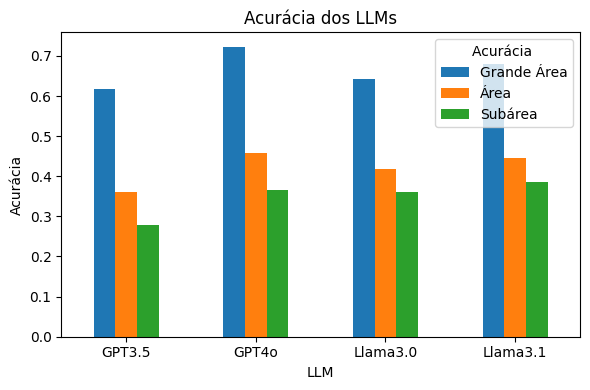

In [21]:
data.set_index('LLM').plot(kind='bar', figsize=(6, 4))

plt.title('Acurácia dos LLMs')
plt.ylabel('Acurácia')
plt.xticks(rotation=0)  
plt.legend(title='Acurácia ')
plt.tight_layout()

plt.show()

## Análise de desempenho do GPT-4o

In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [23]:
def heatmap(ax, title, true_vals, pred_vals):
    cm = confusion_matrix(true_vals, pred_vals, labels=np.unique(true_vals))
    row_sums = np.sum(cm, axis=1)
    filtered_cm = cm[row_sums >= 50, :][:, row_sums >= 50]
    filtered_labels = np.unique(true_vals)[row_sums >= 50]
    sns.heatmap(filtered_cm, annot=True, fmt='d', cmap='Blues', xticklabels=filtered_labels, yticklabels=filtered_labels, ax=ax, cbar=False)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')
    ax.set_title(title)

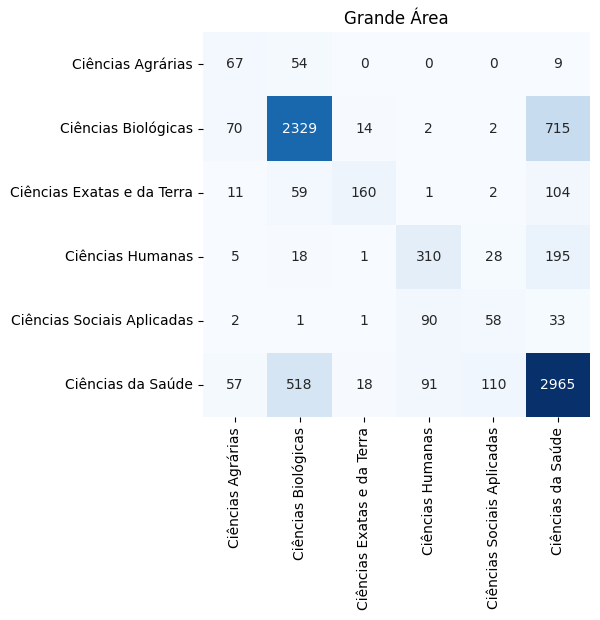

In [24]:
fig, ax = plt.subplots(figsize=(5, 5))
true = df[cnpq[0]].to_list()
pred = [pred[0] for pred in prediction[1]]
heatmap(ax, 'Grande Área', true, pred)
plt.show()

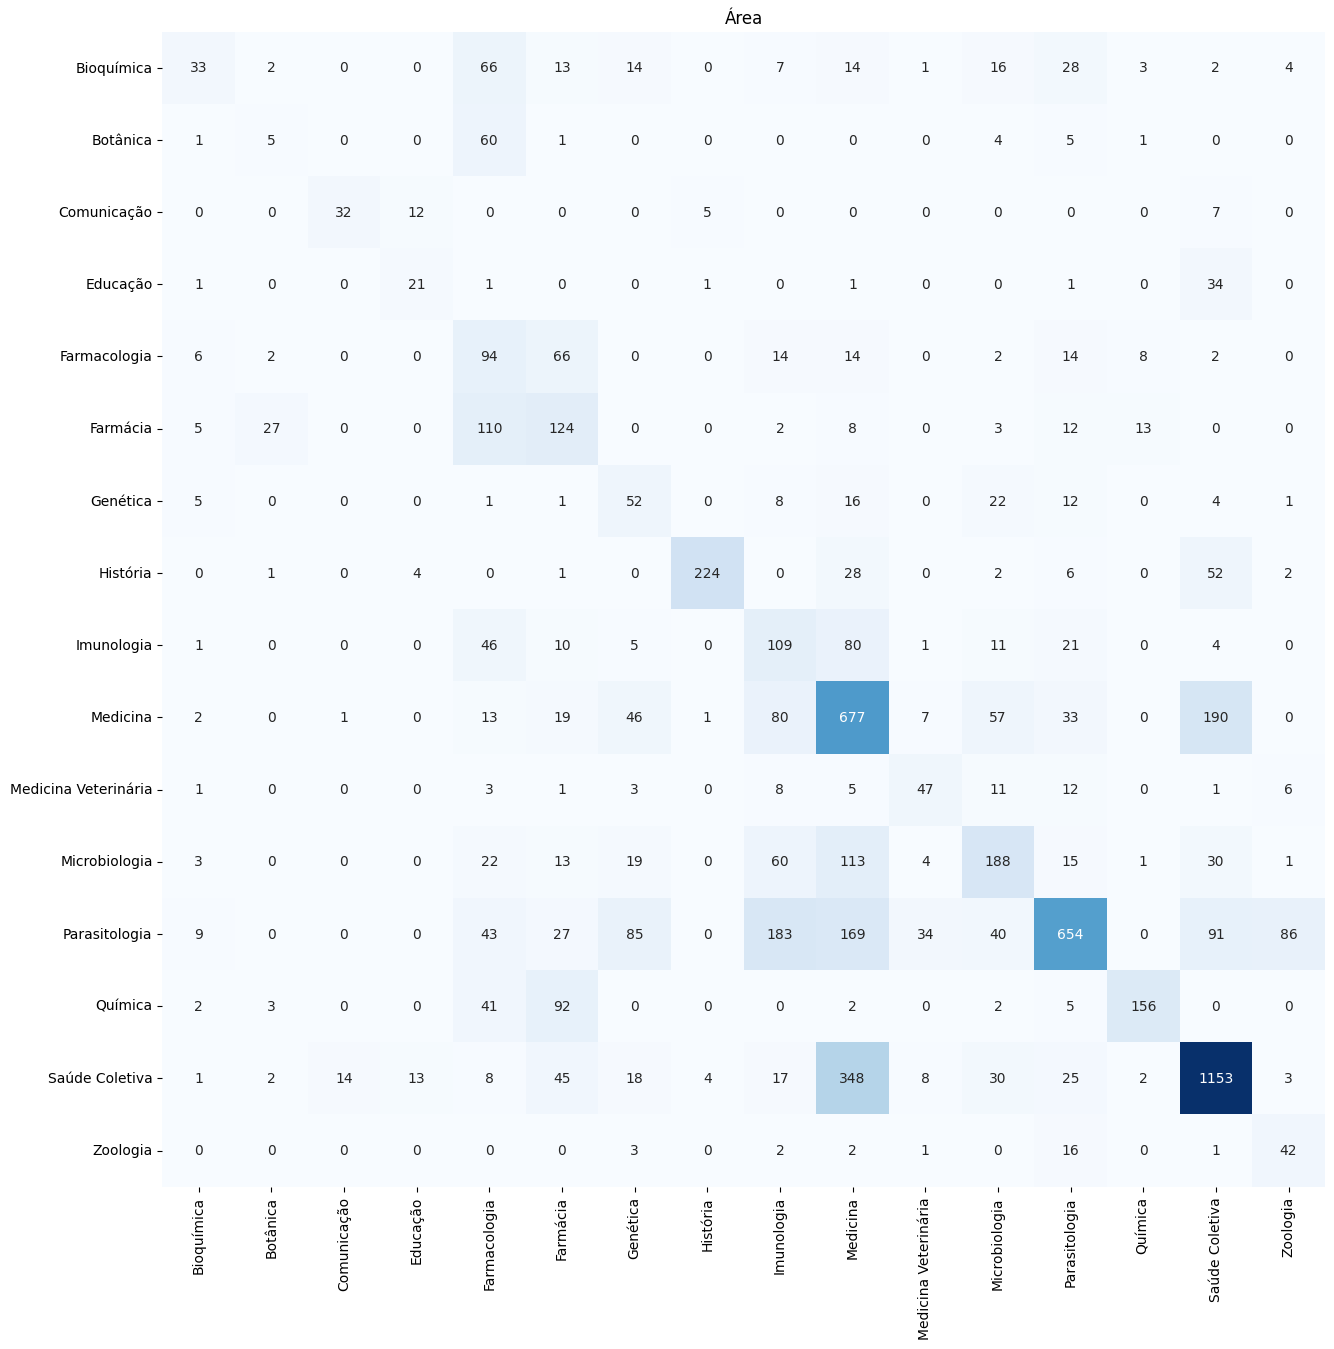

In [25]:
fig, ax = plt.subplots(figsize=(15, 15))
true = df[cnpq[1]].to_list()
pred = [pred[1] for pred in prediction[1]]
heatmap(ax, 'Área', true, pred)
plt.show()

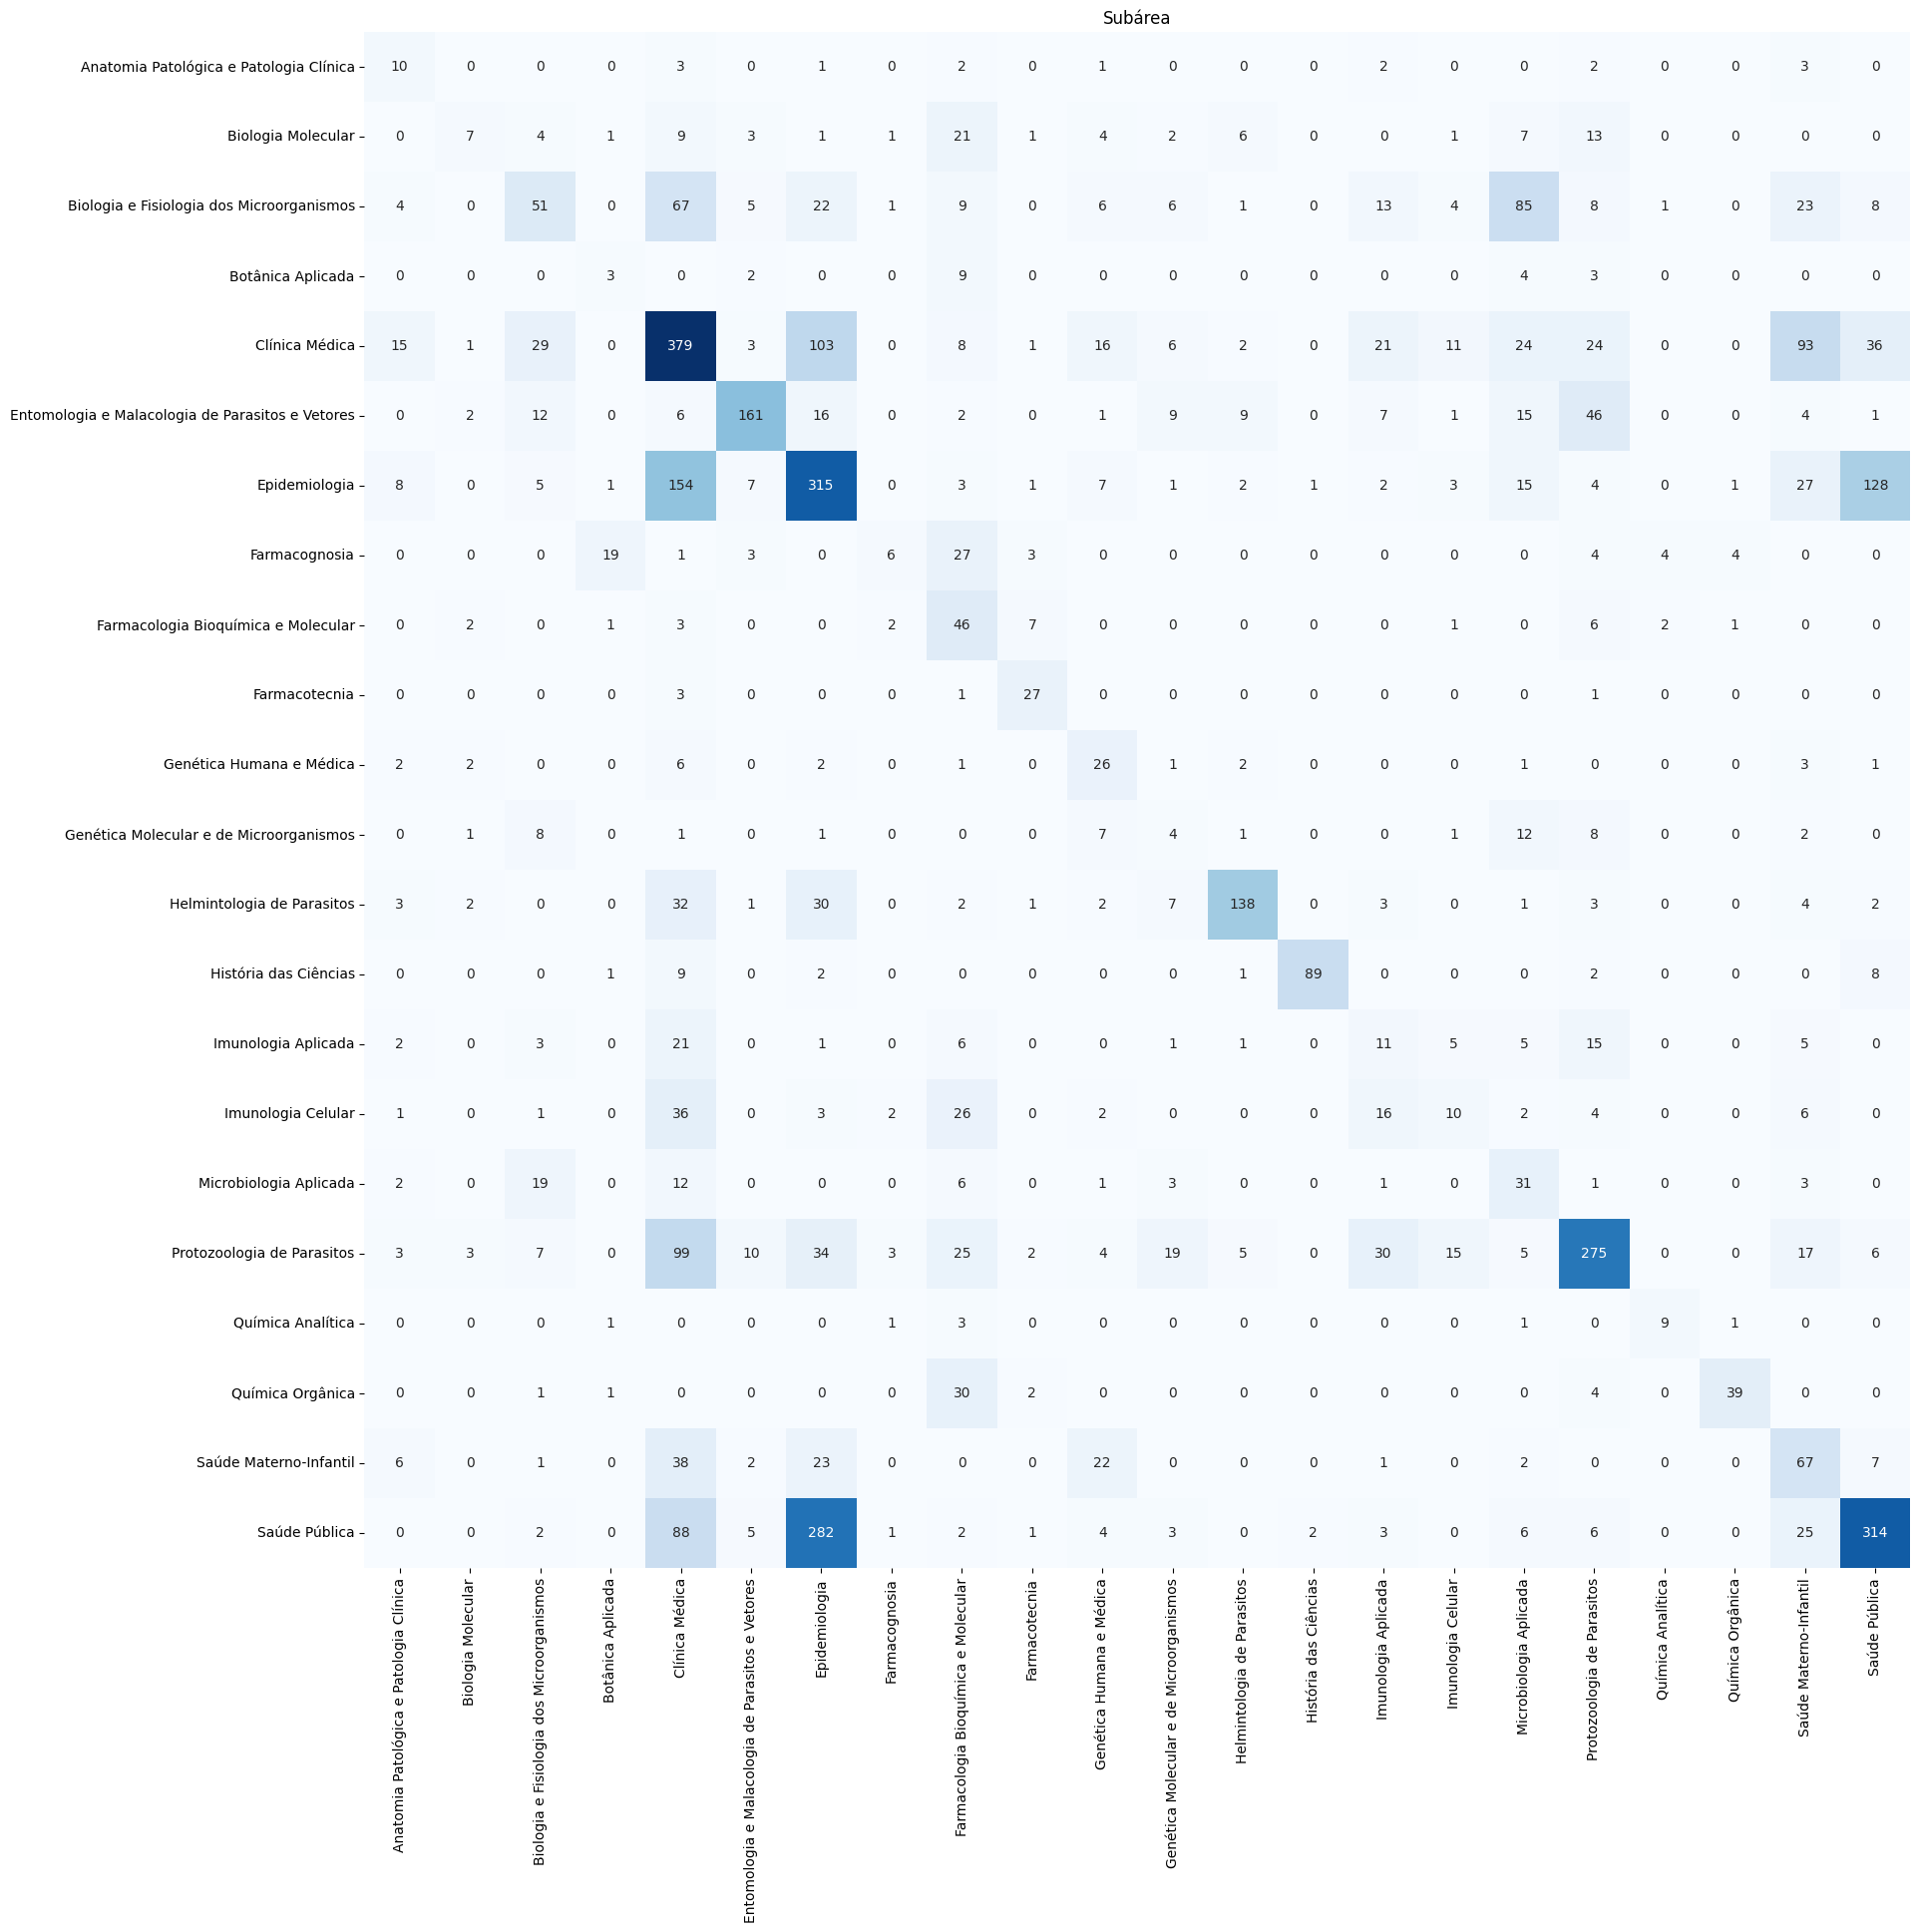

In [26]:
fig, ax = plt.subplots(figsize=(20, 20))
true = df[cnpq[2]].to_list()
idx = [i for i, t in enumerate(true) if t != '']
true = [true[i] for i in idx]
pred = [pred[2] for pred in prediction[1]]
pred = [pred[i] for i in idx]
heatmap(ax, 'Subárea', true, pred)
plt.show()

## Selecionando as amostras aleatórias

In [27]:
idx = random.sample(range(len(df)), 200)

In [28]:
temp = pd.concat([df[['all'] + cnpq].iloc[idx].reset_index(drop=True), pd.DataFrame(prediction[1][idx])], axis=1)

In [29]:
temp.to_csv('expert_analysis.csv')